In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import sem


get_ipython().magic('matplotlib notebook')

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')



In [2]:
#Set csv file locations and load data into dataframes

# File locations
mouse_data_path = "data/mouse_drug_data.csv"
trial_data_path = "data/clinicaltrial_data.csv"

#Load dataframes

mouse_drug_df = pd.read_csv(mouse_data_path)
mouse_drug_df.head()

trial_data_df = pd.read_csv(trial_data_path)
trial_data_df.head()



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [3]:
#Merge the two dataframes so we're only working with one file

drug_results_df = pd.merge(mouse_drug_df, trial_data_df, on=['Mouse ID'])


#Rename the tumor volume column because it's annoying
drug_results_df = drug_results_df.rename(columns={'Tumor Volume (mm3)': 'Volume'})  

#Drop all drugs except for Capomulin, Infubinol, Ketapril, and Placebo

drug_results_df = drug_results_df[drug_results_df['Drug'].isin(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'])]
drug_results_df.head()

,Mouse ID,Drug,Timepoint,Volume,Metastatic Sites
393,q119,Ketapril,0,45.000000,0
394,q119,Ketapril,5,47.864440,0
395,q119,Ketapril,10,51.236606,0
396,n923,Ketapril,0,45.000000,0
397,n923,Ketapril,5,45.824881,0


## Tumor Response to Treatment

In [4]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

#First get rid of the number of metastatic sites and mice for this analysis because we don't need them

drug_results_tumor_df = pd.DataFrame({'Drug' : drug_results_df['Drug'], 'Timepoint' : drug_results_df['Timepoint'], 
                                     'Volume' : drug_results_df['Volume']})
#drug_results_tumor_df.head(20)

#Get the average tumor volume for each drug/timepoint group and then put results into a new dataframe
drug_results_grp = drug_results_tumor_df.groupby(['Drug', 'Timepoint'])
drug_results_grp.mean()

drug_tumor_sum_df = pd.DataFrame(drug_results_grp.mean().reset_index())
drug_tumor_sum_df.head(20)

#rename the Volume column Average Volume

drug_tumor_sum_df.columns = ['Drug', 'Timepoint', 'Average Volume']
drug_tumor_sum_df.head(20)



,Drug,Timepoint,Average Volume
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [5]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint


sem_drug = drug_tumor_sum_df.groupby('Drug').sem()
# sem_drug

drug_results_grp = drug_results_tumor_df.groupby(['Drug', 'Timepoint']).sem()
drug_results_grp

#Convert the grouped object into a dataframe and then display a preview
drug_tumor_sem_df = pd.DataFrame(drug_results_grp.reset_index())
drug_tumor_sem_df.head(20)

#rename the Volume column to SEM

drug_tumor_sem_df.columns = ['Drug', 'Timepoint', 'SEM Volume']
drug_tumor_sem_df.head(20)




,Drug,Timepoint,SEM Volume
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
5,Capomulin,25,0.881642
6,Capomulin,30,0.934460
7,Capomulin,35,1.052241
8,Capomulin,40,1.223608
9,Capomulin,45,1.223977


In [6]:
# Minor Data Munging to Re-Format the Data Frames

#Pivot the AVG volume dataframe so that the drugs are the columns and the index is the timepoint
drug_tumor_avg_df = drug_tumor_sum_df.pivot(index='Timepoint', columns = 'Drug', values = 'Average Volume')
drug_tumor_avg_df

#Pivot the SEM volume dataframe so that the drugs are the columns and the index is the timepoint
drug_tumor_sem_df = drug_tumor_sem_df.pivot(index='Timepoint', columns = 'Drug', values = 'SEM Volume')
drug_tumor_sem_df



Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.235102,0.264819,0.218091
10,0.702684,0.282346,0.357421,0.402064
15,0.838617,0.357705,0.580268,0.614461
20,0.909731,0.476210,0.726484,0.839609
25,0.881642,0.550315,0.755413,1.034872
30,0.934460,0.631061,0.934121,1.218231
35,1.052241,0.984155,1.127867,1.287481
40,1.223608,1.055220,1.158449,1.370634


In [7]:
#Build lists of mean and sem values.  These are needed because the x, y and err parameters of the errorbars method requires
#scalar values and the average and sem columns in our dataframe are series

#Capomulin
capo_means = drug_tumor_avg_df.loc[:, ['Capomulin']]
capo_means = capo_means['Capomulin']
capo_means

capo_sem = drug_tumor_sem_df.loc[:, ['Capomulin']]
capo_sem = capo_sem['Capomulin']
capo_sem

#Infubinol
infub_means = drug_tumor_avg_df.loc[:, ['Infubinol']]
infub_means = infub_means['Infubinol']
infub_means

infub_sem = drug_tumor_sem_df.loc[:, ['Infubinol']]
infub_sem = infub_sem['Infubinol']
infub_sem

#Ketapril
keta_means = drug_tumor_avg_df.loc[:, ['Ketapril']]
keta_means = keta_means['Ketapril']
keta_means

keta_sem = drug_tumor_sem_df.loc[:, ['Ketapril']]
keta_sem = keta_sem['Ketapril']
keta_sem

#Placebo
placebo_means = drug_tumor_avg_df.loc[:, ['Placebo']]
placebo_means = placebo_means['Placebo']
placebo_means

placebo_sem = drug_tumor_sem_df.loc[:, ['Placebo']]
placebo_sem = placebo_sem['Placebo']
placebo_sem



Timepoint
0     0.000000
5     0.218091
10    0.402064
15    0.614461
20    0.839609
25    1.034872
30    1.218231
35    1.287481
40    1.370634
45    1.351726
Name: Placebo, dtype: float64

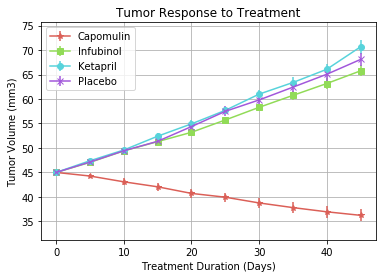

In [26]:
# Generate the Plot (with Error Bars)

#Get min and max values for the avg tumor volume so we can use them in our chart
min_volume = drug_tumor_sum_df.min()['Average Volume']
max_volume = drug_tumor_sum_df.max()['Average Volume']

#add/subtract 5 from the min and max volumes to give some additional white space on the graph

min_volume = min_volume - 5
max_volume = max_volume + 5

current_palette_4 = sns.color_palette("hls", 4)
sns.set_palette(current_palette_4)


plt.grid(True)
plt.ylim(min_volume, max_volume)
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Treatment Duration (Days)")
plt.title("Tumor Response to Treatment")


#average tumor size over time for each drug

#Get the values for the x-axis
time = list(drug_tumor_avg_df.index.values)

#Plot Capomulin
plt.errorbar(time, capo_means, capo_sem, marker = "*", label = "Capomulin")

#Plot Infubinol
plt.errorbar(time, infub_means, infub_sem, marker = "s", label = "Infubinol")

#Plot Ketapril
plt.errorbar(time, keta_means, keta_sem, marker = "o", label = "Ketapril")

#Plot Placebo
plt.errorbar(time, placebo_means, placebo_sem, marker = "x", label = "Placebo")

plt.legend(frameon=True)

plt.savefig('Tumor Response.png') 

plt.show()




## Metastatic Response to Treatment

In [9]:
#Calculate the mean of the metastatic sites grouped by Drug and Timepoint

#First get rid of the volume and mice for this analysis because we don't need them
drug_results_met_df = pd.DataFrame({'Drug' : drug_results_df['Drug'], 'Timepoint' : drug_results_df['Timepoint'], 
                                     'Metastatic Sites' : drug_results_df['Metastatic Sites']})

drug_results_met_df.head(20)


# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

drug_mets_grp = drug_results_met_df.groupby(['Drug', 'Timepoint'])
drug_mets_grp.mean()

#Convert grouped results into a new dataframe

drug_met_avg_df = pd.DataFrame(drug_mets_grp.mean().reset_index())
drug_met_avg_df.head(20)

#rename the mets column Average Met Sites

drug_met_avg_df.columns = ['Drug', 'Timepoint', 'Average Met Sites']
drug_met_avg_df.head(20)

#Get the min and max of the average met sites to use as limits in our plot later on
min_mets = drug_met_avg_df.min()['Average Met Sites']
max_mets = drug_met_avg_df.max()['Average Met Sites']
print(min_mets)
print(max_mets)


0.0
3.3636363636363638


In [10]:
## Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

met_sem_grp = drug_results_met_df.groupby(['Drug', 'Timepoint']).sem()
#met_sem_grp

#Convert the grouped object into a dataframe and then display a preview
drug_mets_sem_df = pd.DataFrame(met_sem_grp.reset_index())
drug_mets_sem_df.head(20)

#rename the Metastatic Sites column to SEM

drug_mets_sem_df.columns = ['Drug', 'Timepoint', 'SEM Met Sites']
drug_mets_sem_df.head(20)

,Drug,Timepoint,SEM Met Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621
5,Capomulin,25,0.181818
6,Capomulin,30,0.172944
7,Capomulin,35,0.169496
8,Capomulin,40,0.175610
9,Capomulin,45,0.202591


In [11]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked

#Pivot the AVG mets dataframe so that the drugs are the columns and the index is the timepoint
drug_met_avg_df = drug_met_avg_df.pivot(index='Timepoint', columns = 'Drug', values = 'Average Met Sites')

#Pivot the SEM volume dataframe so that the drugs are the columns and the index is the timepoint
drug_mets_sem_df = drug_mets_sem_df.pivot(index='Timepoint', columns = 'Drug', values = 'SEM Met Sites')


In [12]:
#Build lists of mean and sem values.  These are needed because the x, y and err parameters of the errorbars method requires
#scalar values and the average and sem columns in our dataframe are a dataframe series type

#Capomulin
capo_met_means = drug_met_avg_df.loc[:, ['Capomulin']]
capo_met_means = capo_met_means['Capomulin']

capo_met_sem = drug_mets_sem_df.loc[:, ['Capomulin']]
capo_met_sem = capo_met_sem['Capomulin']

#Infubinol
infub_met_means = drug_met_avg_df.loc[:, ['Infubinol']]
infub_met_means = infub_met_means['Infubinol']

infub_met_sem = drug_mets_sem_df.loc[:, ['Infubinol']]
infub_met_sem = infub_met_sem['Infubinol']

#Ketapril
keta_met_means = drug_met_avg_df.loc[:, ['Ketapril']]
keta_met_means = keta_met_means['Ketapril']

keta_met_sem = drug_mets_sem_df.loc[:, ['Ketapril']]
keta_met_sem = keta_met_sem['Ketapril']

#Placebo
placebo_met_means = drug_met_avg_df.loc[:, ['Placebo']]
placebo_met_means = placebo_met_means['Placebo']

placebo_met_sem = drug_mets_sem_df.loc[:, ['Placebo']]
placebo_met_sem = placebo_met_sem['Placebo']
placebo_met_sem




Timepoint
0     0.000000
5     0.100947
10    0.115261
15    0.190221
20    0.234064
25    0.263888
30    0.300264
35    0.341412
40    0.297294
45    0.304240
Name: Placebo, dtype: float64

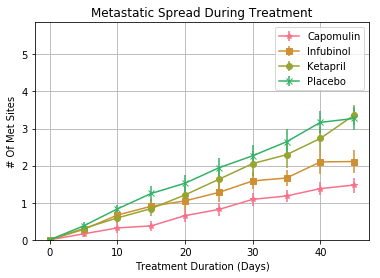

In [25]:
# Generate the Plot (with Error Bars)

current_palette_8 = sns.color_palette("husl", 8)
sns.set_palette(current_palette_8)

#Add a bit to the max mets so that the lines aren't going off the edge of the graph
max_mets = max_mets + 0.5

plt.grid(True)
plt.ylim(min_mets, max_mets)
plt.ylabel("# Of Met Sites")
plt.xlabel("Treatment Duration (Days)")
plt.title("Metastatic Spread During Treatment")


#plot the metastatic spread over time for each drug

#Get the values for the x-axis
time = list(drug_met_avg_df.index.values)

#Plot Capomulin
plt.errorbar(time, capo_met_means, capo_met_sem, marker = "*", label = "Capomulin")

#Plot Infubinol
plt.errorbar(time, infub_met_means, infub_met_sem, marker = "s", label = "Infubinol")

#Plot Ketapril
plt.errorbar(time, keta_met_means, keta_met_sem, marker = "o", label = "Ketapril")

#Plot Placebo
plt.errorbar(time, placebo_met_means, placebo_met_sem, marker = "x", label = "Placebo")

plt.legend(frameon=True)


plt.savefig('Metastatic Spread.png') 

plt.show()






In [14]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


## Survival Rates

In [15]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


In [16]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


In [17]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure


## Summary Bar Graph

In [18]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [19]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
#fig.show()